## Downloading the London bike-sharing dataset from Kaggle and preparing it for analysis and visualization in Tableau

This example dataset contains historical bike sharing data in London from 2015 to 2017. It was downloaded from Kaggle (https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset/) as a CSV file.

In this project, the dataset will go through some adjustments using pandas, before saving it as an Excel datasheet, ready to be uploaded to Tableau.

Tableau will be used to create a dashboard of informative visuals that can help answer some business questions regarding bike sharing in London.


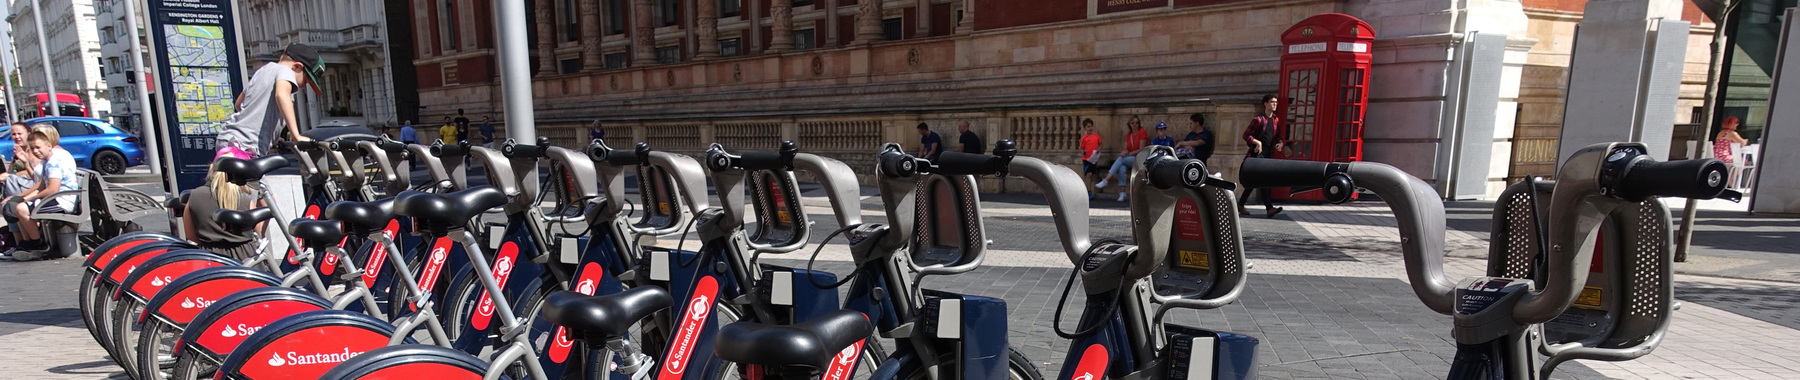

**Metadata:**

"timestamp" - timestamp field for grouping the data

"cnt" - the count of a new bike shares

"t1" - real temperature in C

"t2" - temperature in C "feels like"

"hum" - humidity in percentage

"wind_speed" - wind speed in km/h

"weather_code" - category of the weather

"is_holiday" - boolean field - 1 holiday / 0 non holiday

"is_weekend" - boolean field - 1 if the day is weekend

"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weathe_code" category description:

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [1]:
#import pandas
import pandas as pd

In [2]:
#import zipfile library (uses to extract the file downloaded from Kaggle)
import zipfile

In [3]:
path = r"C:\Users\guyal\OneDrive\Documents\London bike sharing dataset\archive.zip"

In [4]:
with zipfile.ZipFile(path, 'r') as file:
    file.extractall()

In [61]:
#read in the csv file as a pandas dataframe:
bike_shares = pd.read_csv('london_merged.csv')

## Data Exploration and some manipulation

In [62]:
bike_shares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [63]:
bike_shares

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [64]:
bike_shares.weather_code.value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [65]:
bike_shares.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [66]:
#changing some column names using a dict :

new_col_names = {
    'timestamp':'time',
    'cnt':'count',
    't1':'real_temp',
    't2':'feels_like_temp',
    'hum':'humidity_percent',
    'wind_speed': 'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday' :'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

#renaming the specified column names:
bike_shares.columns = bike_shares.columns.map(new_col_names)

In [67]:
bike_shares

,time,count,real_temp,feels_like_temp,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [68]:
#changing 'hunidity_percent' values to values between 0 to 1:
bike_shares.humidity_percent = bike_shares.humidity_percent / 100

In [70]:
#Creating dictionaries for season and weather values to map the specified numerical codes to their corresponding season or weather names:

season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}

weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}

#changing season and weather value type to string:
bike_shares.season = bike_shares.season.astype(str)
bike_shares.weather = bike_shares.weather.astype(str)

#mapping the values to the actual written season name or weather:
bike_shares.season = bike_shares.season.map(season_dict)
bike_shares.weather = bike_shares.weather.map(weather_dict)


In [71]:
bike_shares

,time,count,real_temp,feels_like_temp,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,Broken clouds,0.0,0.0,winter
17410,2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,Cloudy,0.0,0.0,winter
17411,2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,Cloudy,0.0,0.0,winter
17412,2017-01-03 22:00:00,224,5.5,1.5,0.760,23.0,Cloudy,0.0,0.0,winter


In [72]:
#writing the final dataframe to an excel:
bike_shares.to_excel('london_bikes_final.xlsx', sheet_name='Data')